# Assignment Week 2 

* Answer each question completely. 
* Include your code and summarize what you see in a brief narrative.

__Charting:__
Remember to make your charts as self-sufficient as possible (i.e., labels, titles, lack of clutter)  

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/car_prices/car_prices.csv', low_memory=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  object 
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 68.2+ MB


# Data Description:
- year: year the car was built (e.g., the model year)  
- make: the manufacturer. 
- model: specific model of the car  
- trim: subtype of the car model. 
- body: body style of the car. 
- transmission: type of transmission  
- state: state car is registered. 
- condition: numerical rating of the condition, higher is better.  
- odometer: number of miles the car has been driven.   
- color: color of the car.  
- interior: type of interior (e.g., seats). 
- mmr: estimated wholesale price of the car if auctioned.  
- sellingprice: actual sales price of the car.

## Question 1. Determine the number of missing values in each column.

In [16]:
df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 4
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

Features like year, state, seller and sellingprice has no missing values but features like condition, transmission, body have large number of missing values.

## Question 2. Check the data types.
- Which columns are coded to the incorrect type? If any, correct them.

In [17]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition        object
odometer        float64
color            object
interior         object
seller           object
mmr              object
sellingprice      int64
saledate         object
dtype: object

In [18]:
Conditioncounts = df['condition'].value_counts()
df = df[df['condition'].isin(Conditioncounts[Conditioncounts > 50].index)]

df['condition']=df['condition'].astype(float)
df['mmr']=df['mmr'].astype(int)
df['saledate'] = pd.to_datetime(df['saledate'], infer_datetime_format=True)

In [19]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int32
sellingprice      int64
saledate         object
dtype: object

So, we first remove error values by taking away values in any features whose count is very small. This gives a cleaner data.

Then we change datatype condition to float, mmr to int and saledate to datetime.

## Question 3. Analyze the `make` column.
- Comment on what you observe.  
- Clean the column to reduce the number of unique values to as few as reasonably possible (no hard coding). 

Hint: What do you notice if you run this:
```python
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)
```

In [20]:
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)

['acura',
 'acura',
 'airstream',
 'aston martin',
 'audi',
 'audi',
 'bentley',
 'bmw',
 'bmw',
 'buick',
 'buick',
 'cadillac',
 'cadillac',
 'chevrolet',
 'chevrolet',
 'chrysler',
 'chrysler',
 'daewoo',
 'dodge',
 'dodge',
 'dodge tk',
 'dot',
 'ferrari',
 'fiat',
 'fisker',
 'ford',
 'ford',
 'ford tk',
 'ford truck',
 'geo',
 'gmc',
 'gmc',
 'gmc truck',
 'honda',
 'honda',
 'hummer',
 'hyundai',
 'hyundai',
 'infiniti',
 'isuzu',
 'jaguar',
 'jeep',
 'jeep',
 'kia',
 'kia',
 'lamborghini',
 'land rover',
 'land rover',
 'landrover',
 'lexus',
 'lexus',
 'lincoln',
 'lincoln',
 'lotus',
 'maserati',
 'maserati',
 'mazda',
 'mazda',
 'mercedes',
 'mercedes-b',
 'mercedes-benz',
 'mercury',
 'mercury',
 'mini',
 'mitsubishi',
 'mitsubishi',
 'nan',
 'nissan',
 'nissan',
 'oldsmobile',
 'oldsmobile',
 'plymouth',
 'plymouth',
 'pontiac',
 'pontiac',
 'porsche',
 'porsche',
 'ram',
 'rolls-royce',
 'saab',
 'saturn',
 'scion',
 'smart',
 'subaru',
 'subaru',
 'suzuki',
 'suzuki',
 '

We see a lot of values repeating. This means we have a lot of features with the same value just with different case[mixture of upper and lower case]. They are treated differently which should not be the case.

In [21]:
df= df.applymap(lambda s:s.lower() if type(s) == str else s)

In [22]:
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)

['acura',
 'airstream',
 'aston martin',
 'audi',
 'bentley',
 'bmw',
 'buick',
 'cadillac',
 'chevrolet',
 'chrysler',
 'daewoo',
 'dodge',
 'dodge tk',
 'dot',
 'ferrari',
 'fiat',
 'fisker',
 'ford',
 'ford tk',
 'ford truck',
 'geo',
 'gmc',
 'gmc truck',
 'honda',
 'hummer',
 'hyundai',
 'infiniti',
 'isuzu',
 'jaguar',
 'jeep',
 'kia',
 'lamborghini',
 'land rover',
 'landrover',
 'lexus',
 'lincoln',
 'lotus',
 'maserati',
 'mazda',
 'mercedes',
 'mercedes-b',
 'mercedes-benz',
 'mercury',
 'mini',
 'mitsubishi',
 'nan',
 'nissan',
 'oldsmobile',
 'plymouth',
 'pontiac',
 'porsche',
 'ram',
 'rolls-royce',
 'saab',
 'saturn',
 'scion',
 'smart',
 'subaru',
 'suzuki',
 'tesla',
 'toyota',
 'volkswagen',
 'volvo',
 'vw']

We change values with str type to lower case. This reduces the the number of unique values to as few as reasonably possible.

In [23]:
df['make'].value_counts()

ford          92452
chevrolet     59204
nissan        53186
toyota        39079
dodge         30308
              ...  
dodge tk          1
airstream         1
dot               1
mercedes-b        1
lotus             1
Name: make, Length: 63, dtype: int64

## Question 4. Analyze the relationship between the wholeprice `mmr` and the `salesprice`.
- What is the overall correlation?  
- What happens to the correlation as you increase the maximum selling price window (e.g., 0-10000, 0-20000,...)?
- Create a scatter plot with the relationship.  
- Create a graph that shows how the correlation changes.

In [9]:
corr = df['mmr'].corr(df['sellingprice'])
print('Overall Correlation = ' , corr)

Overall Correlation =  0.9838184764590497


In [10]:
range = [5000, 10000, 20000, 50000, 75000, 100000, 125000, 150000, 175000, 200000]
output = []

for i in range:
  df_new = df[df['sellingprice']<i]
  corr = df_new['mmr'].corr(df_new['sellingprice'])
  print('Overall Correlation at selling price window 0 - ', i, ' = ' , corr)
  output.append(corr)

Overall Correlation at selling price window 0 -  5000  =  0.6541860687482615
Overall Correlation at selling price window 0 -  10000  =  0.8722695983318485
Overall Correlation at selling price window 0 -  20000  =  0.958189817996349
Overall Correlation at selling price window 0 -  50000  =  0.9814253375873482
Overall Correlation at selling price window 0 -  75000  =  0.983126614516934
Overall Correlation at selling price window 0 -  100000  =  0.983769769912455
Overall Correlation at selling price window 0 -  125000  =  0.9839079743992518
Overall Correlation at selling price window 0 -  150000  =  0.9840744935685447
Overall Correlation at selling price window 0 -  175000  =  0.9842160799054257
Overall Correlation at selling price window 0 -  200000  =  0.9842247874608676


Text(0.5, 1.0, 'Observed Trend')

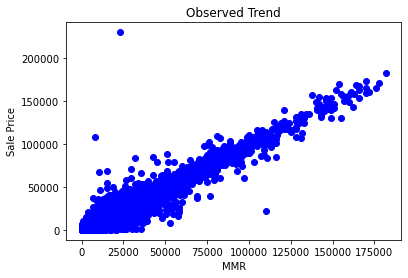

In [11]:
plt.scatter(df['mmr'], df['sellingprice'], c ="blue")
plt.ylabel('Sale Price')
plt.xlabel('MMR')
plt.title('Observed Trend')

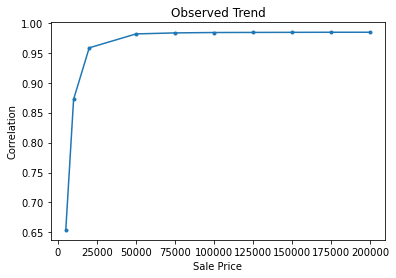

In [12]:
plt.plot(range, output, marker = '.')
plt.xlabel('Sale Price')
plt.ylabel('Correlation')
plt.title('Observed Trend')
plt.show()

## Question 5. How does the distribution of `salesprice` vary by make for cars made between 2014-2015?
- Use the 10 most common makes (your cleaned version of this column).  
- Create a graph that answers this question.

In [29]:
top_makes = df['make'].value_counts(normalize=False).head(10)
print(top_makes)

ford         92452
chevrolet    59204
nissan       53186
toyota       39079
dodge        30308
honda        26494
hyundai      21495
bmw          20379
kia          17879
chrysler     17103
Name: make, dtype: int64


Index(['ford', 'nissan', 'chevrolet', 'toyota', 'dodge', 'hyundai', 'honda',
       'kia', 'infiniti', 'bmw'],
      dtype='object')


,year,condition,odometer,mmr,sellingprice
count,269573.00000,269573.000000,269569.000000,269573.000000,269573.000000
mean,2012.53591,3.745855,41116.479291,16382.824226,16212.961391
std,1.21696,0.822903,28511.544467,7754.426098,7917.289225
min,2010.00000,1.000000,1.000000,1100.000000,1.000000
25%,2012.00000,3.300000,21767.000000,11350.000000,11100.000000
50%,2013.00000,3.900000,35486.000000,14400.000000,14250.000000
75%,2013.00000,4.400000,53660.000000,19600.000000,19500.000000
max,2015.00000,5.000000,999999.000000,176000.000000,230000.000000


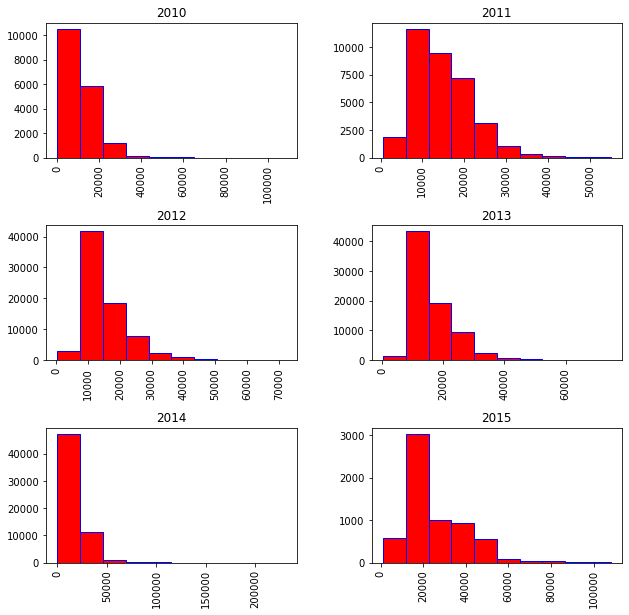

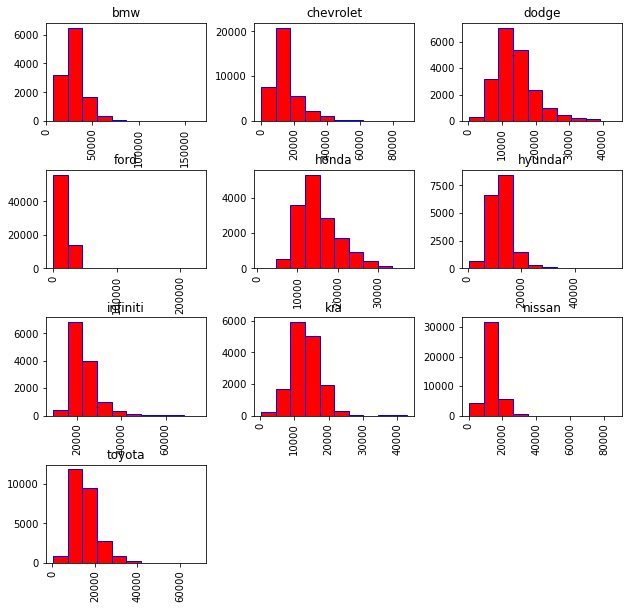

In [47]:

topten_make = dftemp['make'].value_counts().head(10).index
print(topten_make)
df = df[df['make'].isin(topten_make)]
dftemp = df.query('year >= 2010 and year <= 2015')
dftemp = dftemp.loc[dftemp['make'].isin(topten_make)]
dftemp.hist('sellingprice', 'year',figsize=(10,10),facecolor='red',edgecolor='blue')
dftemp.hist('sellingprice', 'make',figsize=(10,10),facecolor='red',edgecolor='blue')
dftemp.describe()